# Dimension Reduction

[Andrew Wheeler, PhD](mailto:andrew.wheeler@hms.com)

This is an introduction to dimension reduction (using *Principal Components Analysis*, aka PCA). 

The dimension reduction example is using American Community Survey Data for all census tracts in Texas, 5 year estimates as of 2019. With this data I have four variables as percentages:

 - Families in Poverty
 - Single Parent Households with Children under 18
 - Limited English Proficiency
 - No Vehicle
 
These are only a limited set of variables, meant to be a simple introduction to using PCA to get something similar to the *social determinants of health* estimate for a place.

If you have questions about downloading/manipulating census data feel free to contact. I have created scripts to automate many of these processes in python over the years.


In [1]:
# Libraries we need
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import scale
import os

# Changing the directory to where I have the data stored
os.chdir(r'C:\Users\e009156\Documents\GitHub\data-science-utils\education\Intro_DataScience\DimensionReduction_UnsupervisedLearning')

# Reading in the census data, social determinants of health -> sdet
sdet = pd.read_csv('SocialDet_TexCT.csv', index_col='LOGRECNO')
sdet.head(10) #these are all as proportions

,PovertyFamily,SingleHeadwithKids,LimitedEnglishPop,NoCarWorkers
LOGRECNO,,,,
4295,0.134318,0.029823,0.013348,0.015126
4296,0.000000,0.021807,0.007292,0.000000
4297,0.329545,0.141463,0.008532,0.000000
4298,0.144231,0.052799,0.095979,0.031536
4299,0.113090,0.034755,0.008384,0.160606
4300,0.181655,0.044419,0.136452,0.013725
4301,0.172199,0.063035,0.034688,0.019985
4302,0.055024,0.023200,0.016935,0.018149
4303,0.069044,0.006887,0.024245,0.046362


In [2]:
# Lets look at the correlations between each of these variables
sdet.corr()

,PovertyFamily,SingleHeadwithKids,LimitedEnglishPop,NoCarWorkers
PovertyFamily,1.000000,0.547829,0.587112,0.449034
SingleHeadwithKids,0.547829,1.000000,0.256104,0.304791
LimitedEnglishPop,0.587112,0.256104,1.000000,0.259051
NoCarWorkers,0.449034,0.304791,0.259051,1.000000


In [3]:
# Before you do PCA, you should scale the variables (this creates z-scores)
scale_det = pd.DataFrame(scale(sdet), columns=list(sdet))
print( scale_det.describe() )

# But does not change the correlations
scale_det.corr()

       PovertyFamily  SingleHeadwithKids  LimitedEnglishPop  NoCarWorkers
count   5.265000e+03        5.265000e+03       5.265000e+03  5.265000e+03
mean    1.158090e-16        1.308650e-16       3.182402e-16 -6.470818e-16
std     1.000095e+00        1.000095e+00       1.000095e+00  1.000095e+00
min    -1.187493e+00       -1.586051e+00      -8.596388e-01 -7.340924e-01
25%    -7.603680e-01       -7.156873e-01      -6.949373e-01 -6.294640e-01
50%    -2.605318e-01       -1.336897e-01      -4.079064e-01 -3.288020e-01
75%     5.002991e-01        5.466501e-01       3.402167e-01  2.521727e-01
max     8.095365e+00        1.498024e+01       5.750510e+00  1.571080e+01


,PovertyFamily,SingleHeadwithKids,LimitedEnglishPop,NoCarWorkers
PovertyFamily,1.000000,0.547829,0.587112,0.449034
SingleHeadwithKids,0.547829,1.000000,0.256104,0.304791
LimitedEnglishPop,0.587112,0.256104,1.000000,0.259051
NoCarWorkers,0.449034,0.304791,0.259051,1.000000


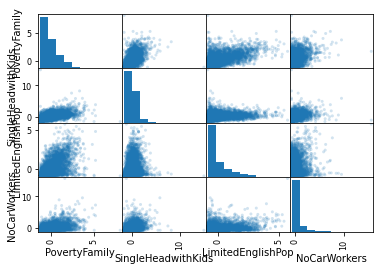

In [4]:
# Annoying error for matplotlib
import warnings
warnings.filterwarnings("ignore")

# Scatterplot matrix
axes = pd.plotting.scatter_matrix(scale_det, alpha=0.2)

In [5]:
# Now we are going to conduct PCA 

# Helper function to turn principal component scores into nice pandas dataframe
def pd_comp(PCA, data):
    res = PCA.transform(data)
    cols = ['PC' + str(i+1) for i in range(data.shape[1])]
    res_dat = pd.DataFrame(res,columns=cols)
    return res_dat

# sklearn object to fit PCA
pca = decomposition.PCA()
pca.fit(scale_det)
res = pd_comp(pca, scale_det)

# We get 4 new variables!
print( res.head(10) )

# And they have zero correlation with one another
res.corr()

        PC1       PC2       PC3       PC4
0 -0.470241  0.323328 -0.231908  0.457786
1 -1.638550  0.121828 -0.184339 -0.264323
2  3.017197  2.120470 -4.545233 -0.077607
3  0.795040  0.340068 -0.535677 -0.416899
4  1.429447  2.847041  2.714926 -0.524956
5  0.790415 -0.499015 -0.589200 -0.108288
6  0.703555  0.840933 -1.260273 -0.018250
7 -1.006926  0.300257  0.128568 -0.033911
8 -0.899459  0.355482  1.291909  0.184173
9 -0.687313  0.440851 -0.868489  0.117201


,PC1,PC2,PC3,PC4
PC1,1.000000e+00,-2.349428e-16,5.070204e-17,6.808179e-16
PC2,-2.349428e-16,1.000000e+00,-1.767719e-16,-3.564981e-16
PC3,5.070204e-17,-1.767719e-16,1.000000e+00,3.316231e-16
PC4,6.808179e-16,-3.564981e-16,3.316231e-16,1.000000e+00


In [6]:
# The first PC component tends to describe a larger amount of variance
print('Explained Variance per each component')
print(pca.explained_variance_ratio_) #PC1 55% of variance, PC2 19%, PC3 18%, etc.

# The loadings tell us how each of the original variables 
# contributes to the new PCA results

# A helper function to get the loadings, adapted from
# https://scentellegher.github.io/machine-learning/2020/01/27/pca-loadings-sklearn.html
def loadings(data,pca):
    comps = pca.components_.T
    cols = ['PC' + str(i+1) for i in range(comps.shape[0])]
    load_dat = pd.DataFrame(comps,columns=cols,index=list(data))
    return load_dat

load_dat = loadings(scale_det,pca)
load_dat

Explained Variance per each component
[0.55732931 0.19241149 0.17539124 0.07486796]


,PC1,PC2,PC3,PC4
PovertyFamily,0.598198,-0.122298,-0.085184,0.787366
SingleHeadwithKids,0.474038,0.400756,-0.689855,-0.372536
LimitedEnglishPop,0.476419,-0.734364,0.149112,-0.459890
NoCarWorkers,0.436430,0.533992,0.703285,-0.172546


In [7]:
# The loadings show how the PC variables are created back into
# the original data

print( res['PC1'].head(5).round(2) )

pc1 = scale_det['PovertyFamily']*0.598198 + scale_det['SingleHeadwithKids']*0.474038 + \
      scale_det['LimitedEnglishPop']*0.476419 + scale_det['NoCarWorkers']*0.436430
pc1.head(5).round(2)

# Or this is a more automatic way
# (scale_det*load_dat['PC1']).sum(axis=1).head(5)

0   -0.47
1   -1.64
2    3.02
3    0.80
4    1.43
Name: PC1, dtype: float64


0   -0.47
1   -1.64
2    3.02
3    0.80
4    1.43
dtype: float64